# Projeto 2 - Análise de dados

**Nome:** *Maria Eduarda Gonçalves Torres*

**Nome:** *Pedro Rubens*

$\Rightarrow$ Carregando algumas bibliotecas :

In [44]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import os
import re 
import seaborn as sns
from numpy import nan
from numpy import isnan
import sys 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

$\Rightarrow$ Importando database :

In [2]:
data='data.csv'
dados = pd.read_csv( data, index_col = 0)
dados.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


O objetivo é **explicar/prever** as chances do cancer de mama da paciente ser, benigno ou maligno em função das características dos núcleos celulares.
Os recursos são calculados a partir de uma imagem digitalizada de um aspirado por agulha fina (FNA) de uma massa mamária.

Por conta disso, vamos considerar `diagnosis` como variável dependente (variável resposta ou variável *target*) para ser considerada no `eixo y`. E  o resto das colunas como independentes (explicativa ou *features*) no `eixo x`.

$\Rightarrow$ *Vamos usar "df.drop() " para remover a última coluna que esta em branco, como não temos o nome da coluna vamos usar esse "df.drop(df.columns[[  ]], axis=1)" especifico, onde conseguimos apagar a coluna pelo número de sua posição. A coluna "id" também será removida do dataset pois não sera útil para nossa validação*

In [3]:
dados = dados.drop(dados.columns[[31]], axis=1) 

In [4]:
dados

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


$\Rightarrow$ *Vamos usar o dados.shape( ) para descobrir o número de linhas e o número de colunas*

In [5]:
dados.shape

(569, 31)

$\Rightarrow$ *O código abaixo vai conferir se não temos mais nenhum "nan" e se nosso dataframe está todo em "float"*

In [6]:
dados.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [7]:
dados['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
dados['diagnosis'] = dados['diagnosis'].map({'B': 1, 'M': 0})
dados

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [22]:
#X = np.array(dados.drop('diagnosis',1))
#Y = dados.iloc[:,:1].values

In [26]:
X = dados.drop('diagnosis',1)
Y = dados['diagnosis']

In [51]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [11]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)

In [12]:
#funçao que faz com que o x0 seja sempre 1
#def coloca_uns(X):
#    uns = np.ones([X.shape[0],1])
#    return np.concatenate((uns,X),axis=1)
    
#funçao sigmod
#def sigmoid(x):
#    return 1/(1+np.exp(-x))

#def binary_cross_entropy(w,X,Y):
#    amostras = len(X)

#    funçao = np.sum(np.multiply(-Y,np.log(sigmoid(X @ w.T)))-(np.multiply((1-Y),np.log(1 - sigmoid(X @ w.T)))))

#    return funçao/amostras

#gradiente descendente
#def gradient_descent(w,X,y,alpha,epoch):
#    cost = np.zeros(epoch)
#    for i in range(epoch):
#        w = w - (alpha/len(X)) * np.sum((sigmoid(X @ w.T) - Y)*X, axis=0)
#        cost[i] = binary_cross_entropy(w, X, Y)
    
#    return w,cost

In [13]:
#melhorar a base de dados, para aumentar a porcetagem de acertos 
#diagnostico = 0 
#acerto = 0
#for i in range(0,569):
#    if sigmoid(X[i]@ w.T) > 0.5:
#       diagnostico = 1
#    if predict(w,X[i]):
#        acerto+=1
#acerto/569

*HISTOGRAMAS*

In [20]:
varquanti=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
 'smoothness_mean', 'compactness_mean', 'concavity_mean',
 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

varquali = dados['diagnosis']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


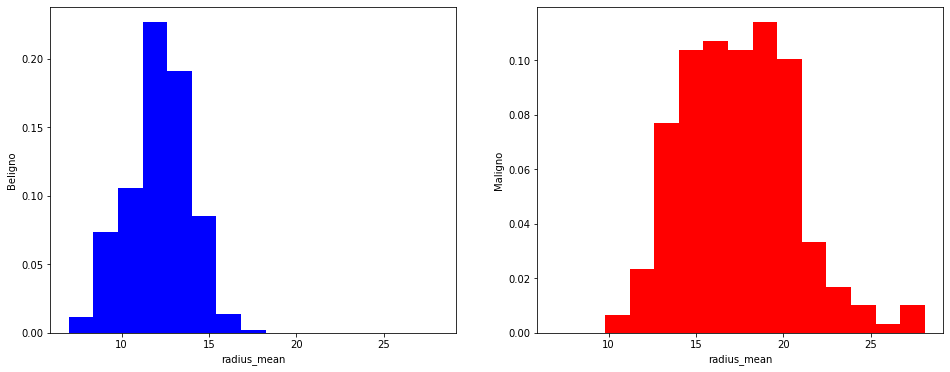

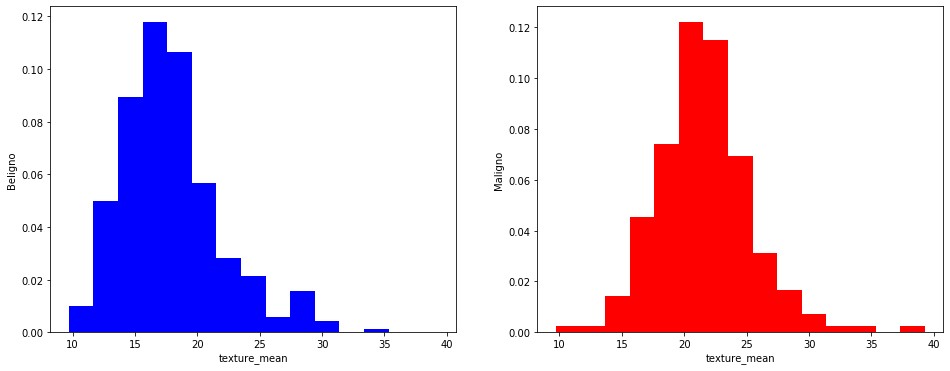

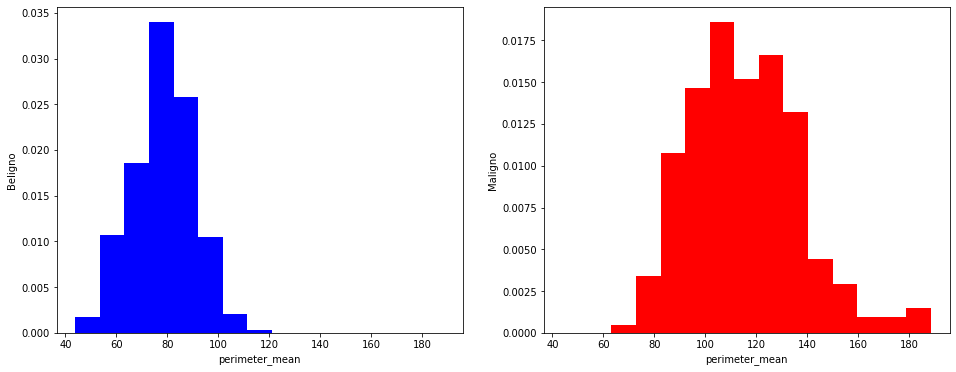

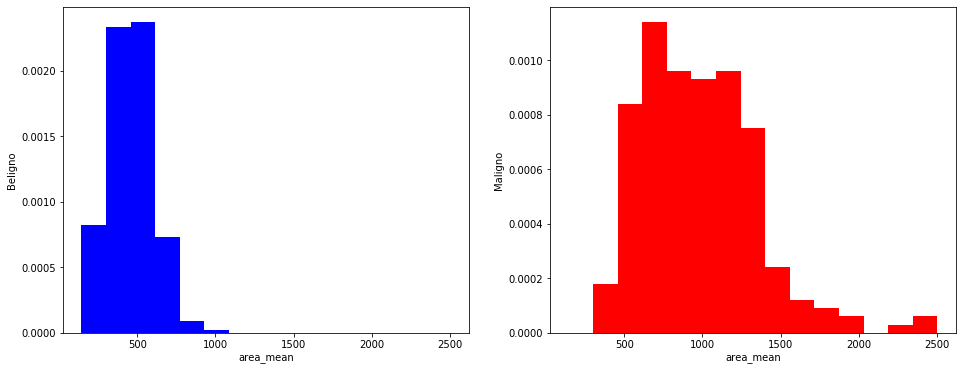

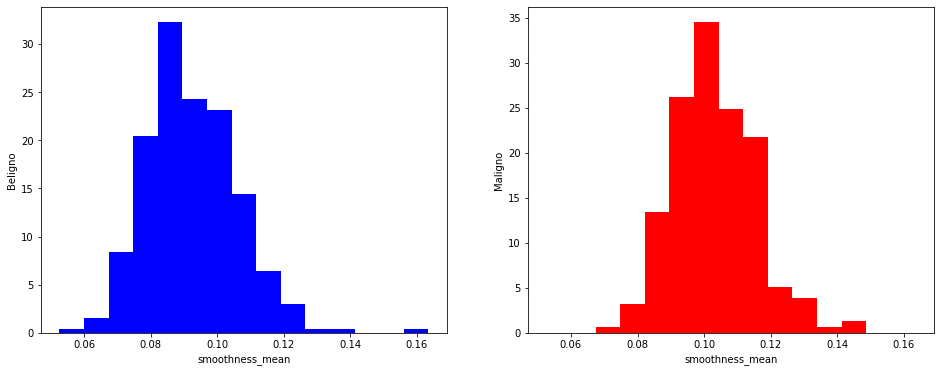

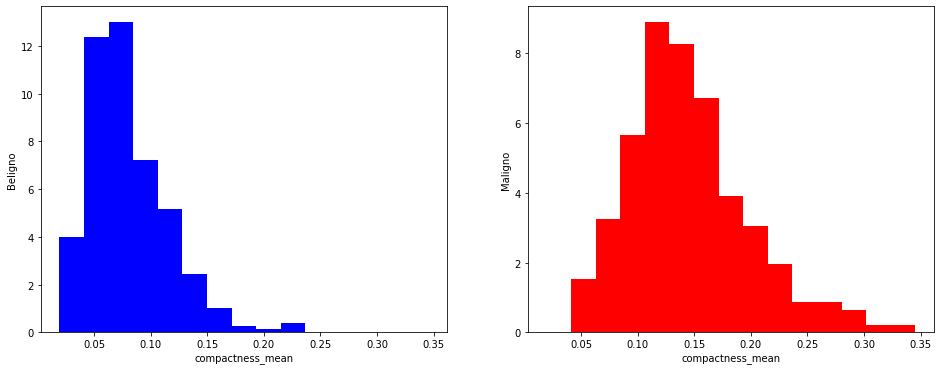

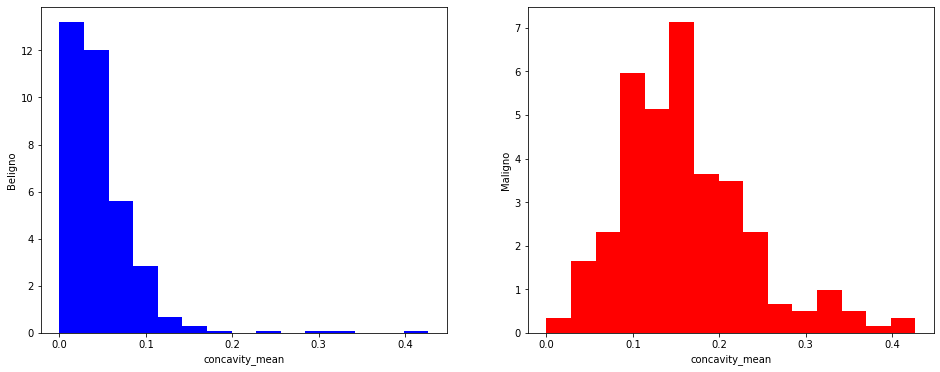

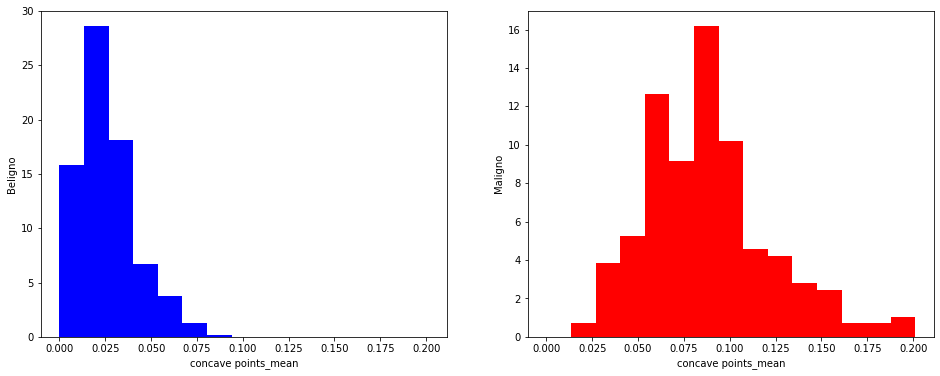

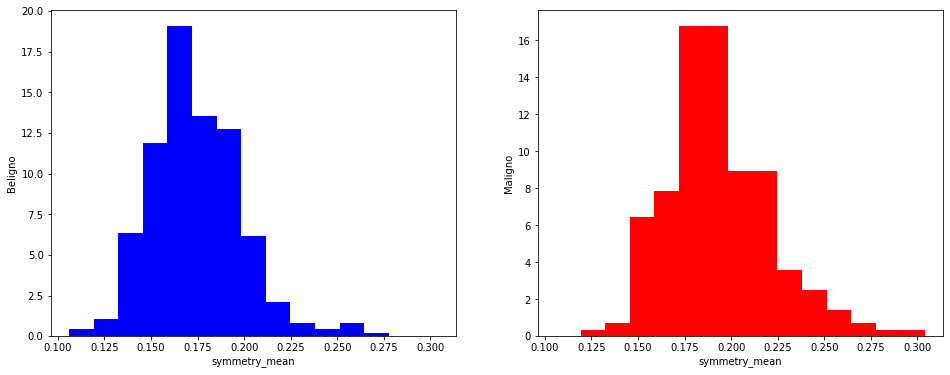

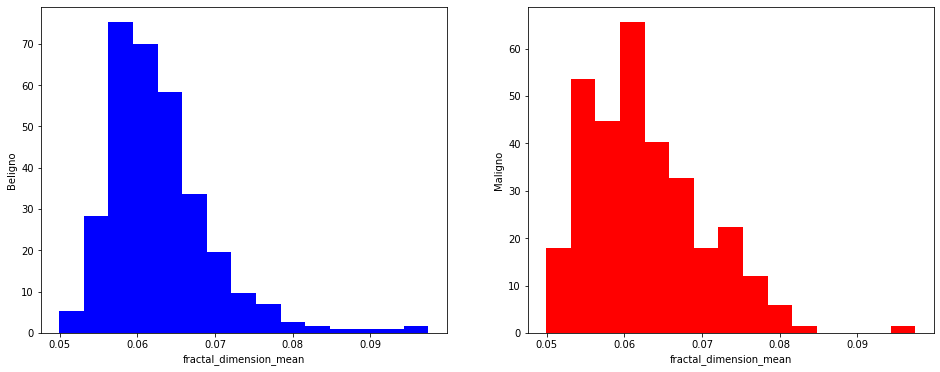

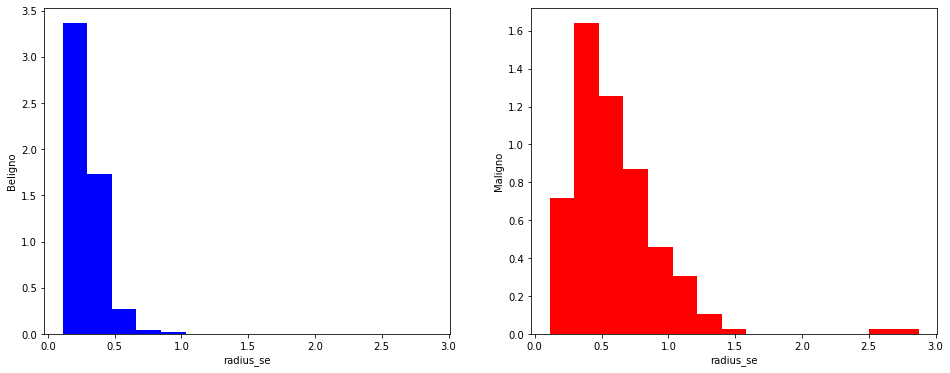

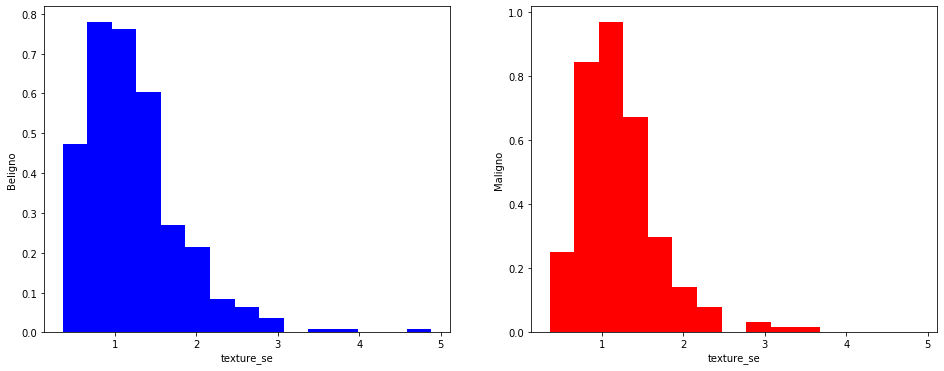

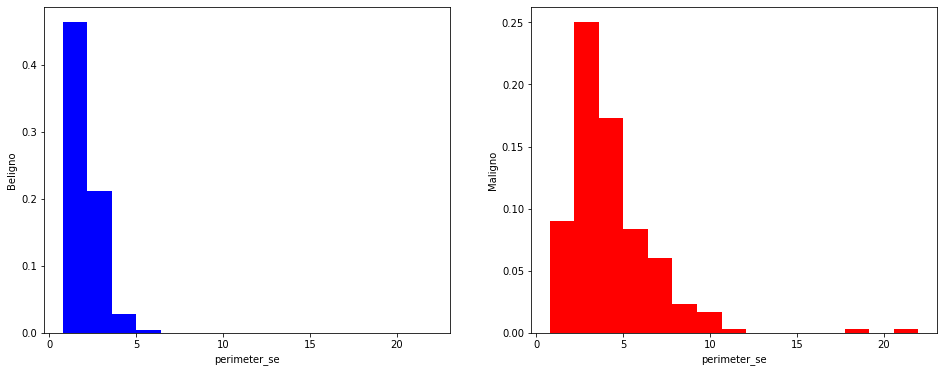

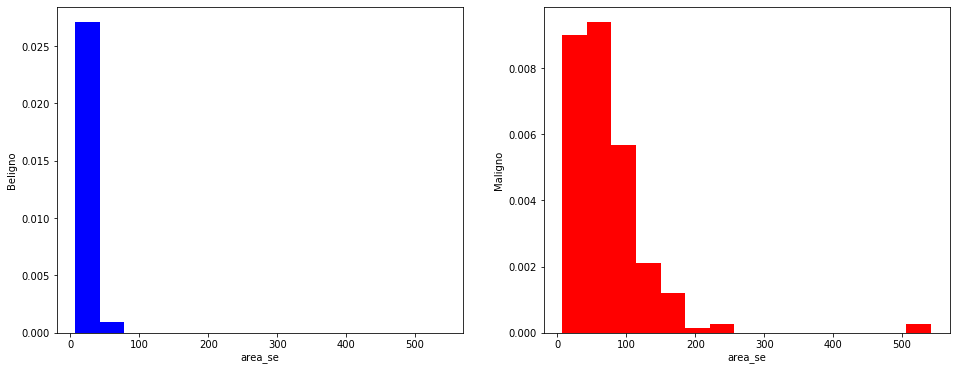

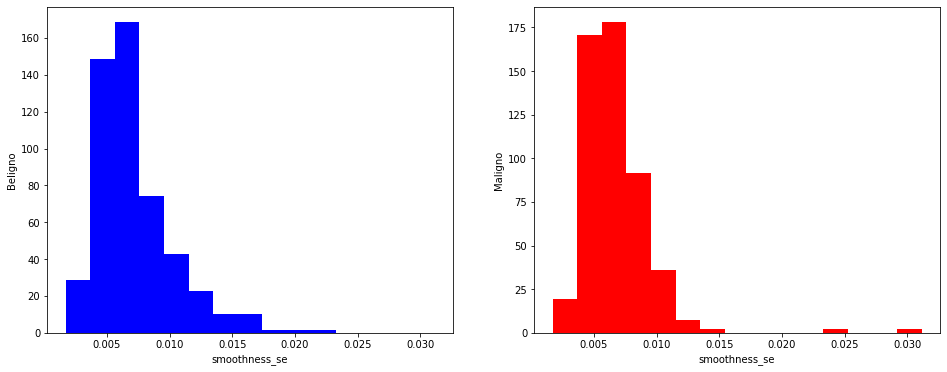

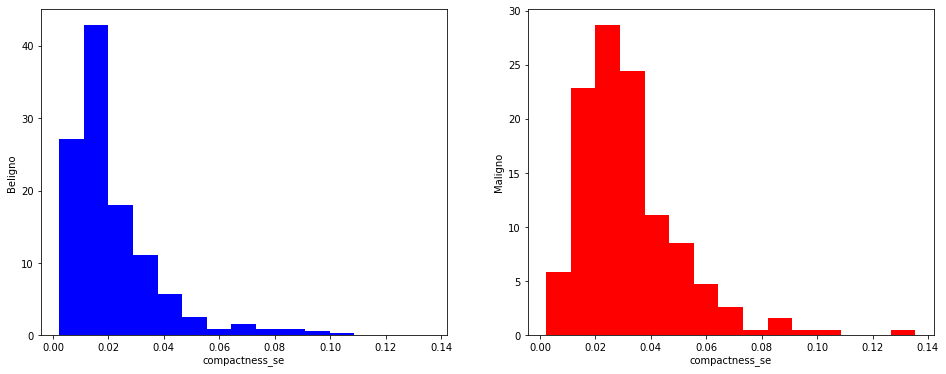

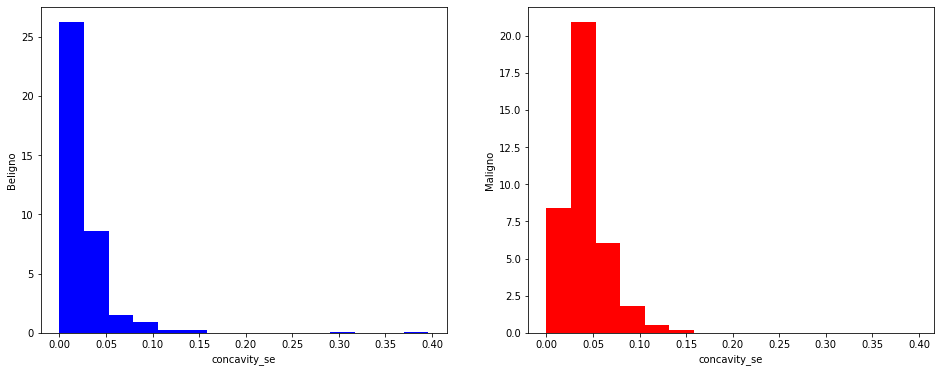

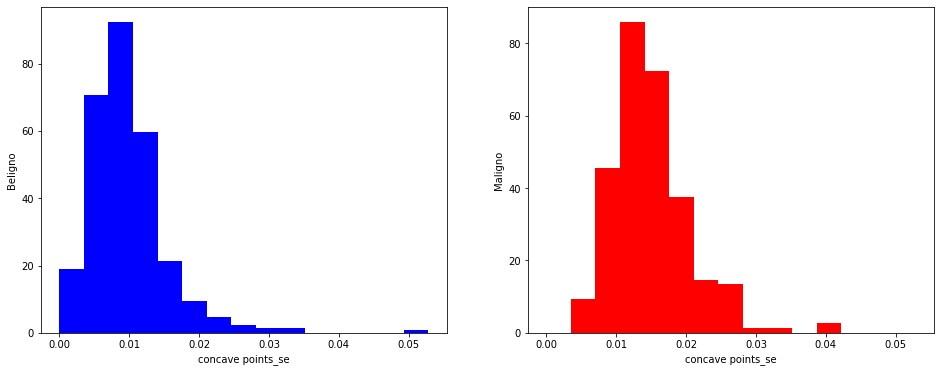

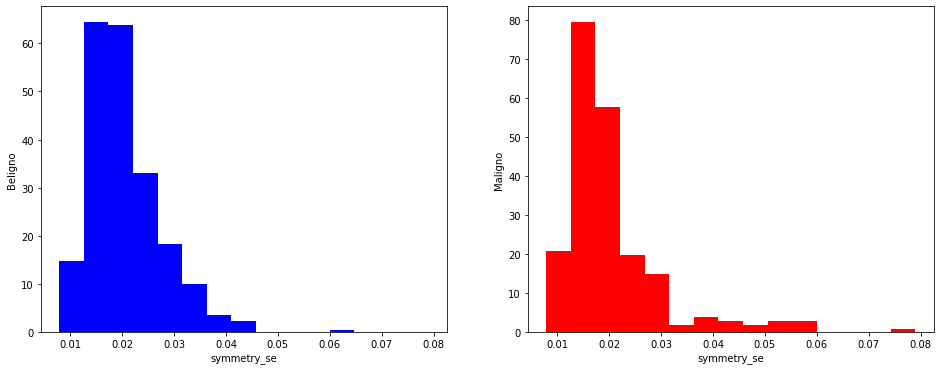

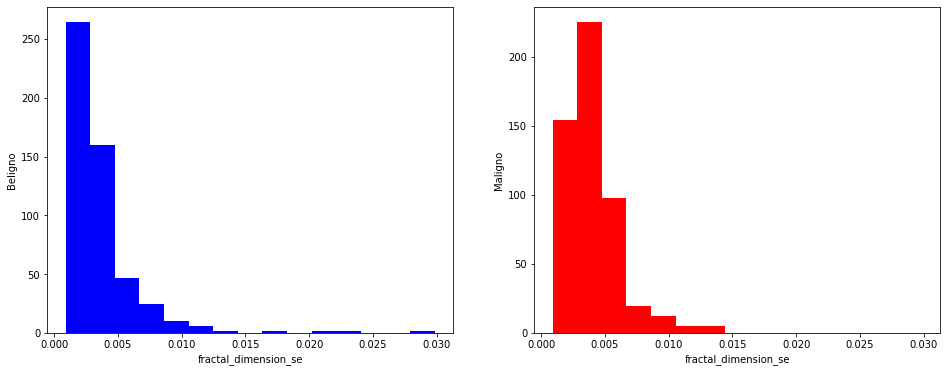

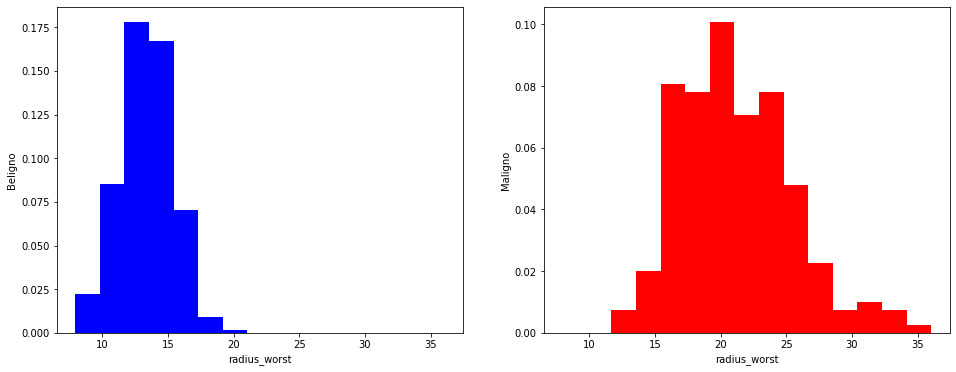

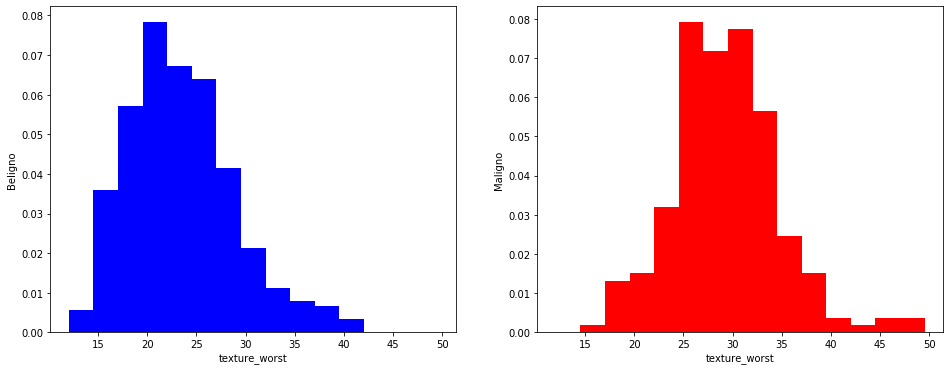

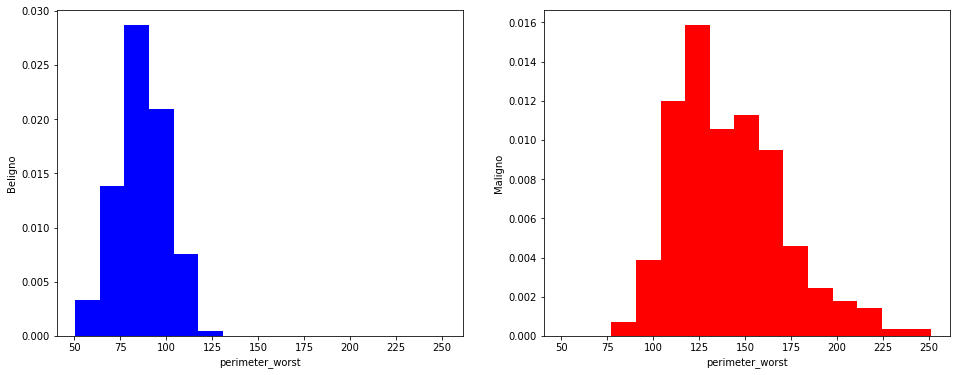

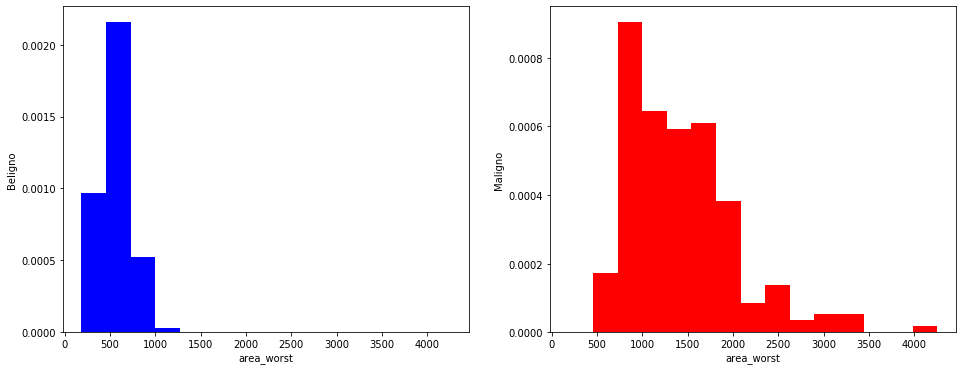

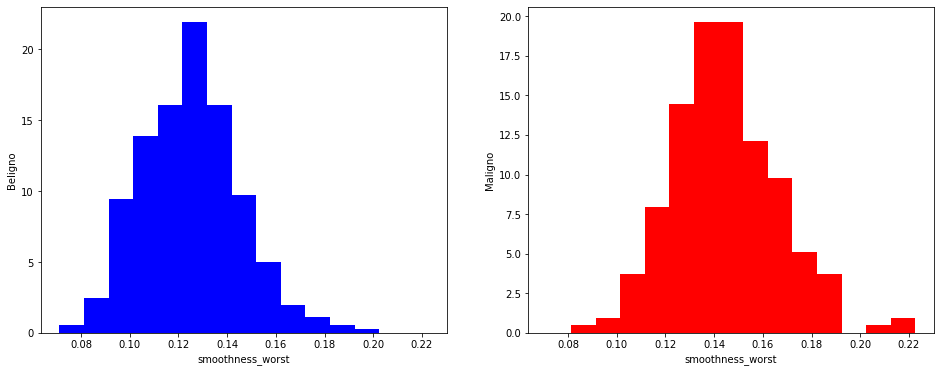

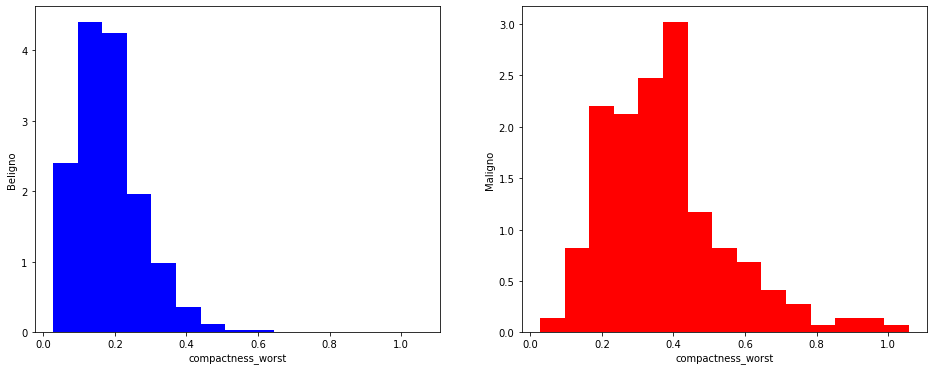

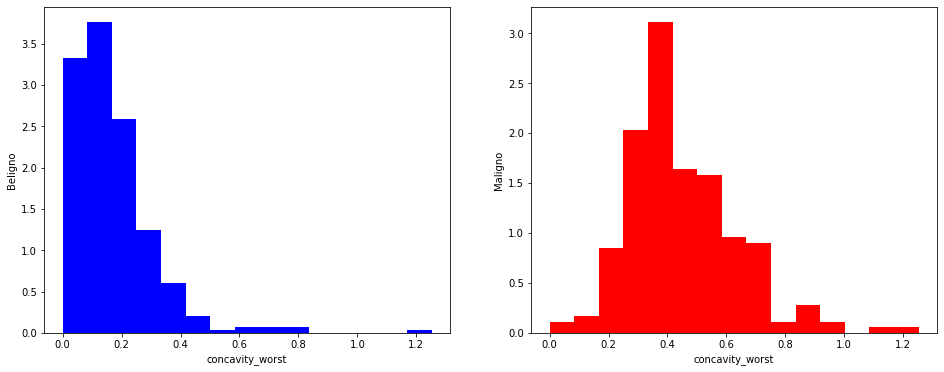

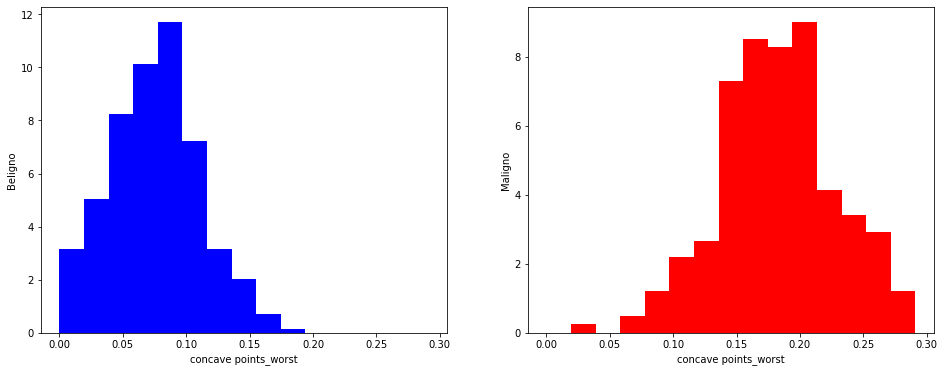

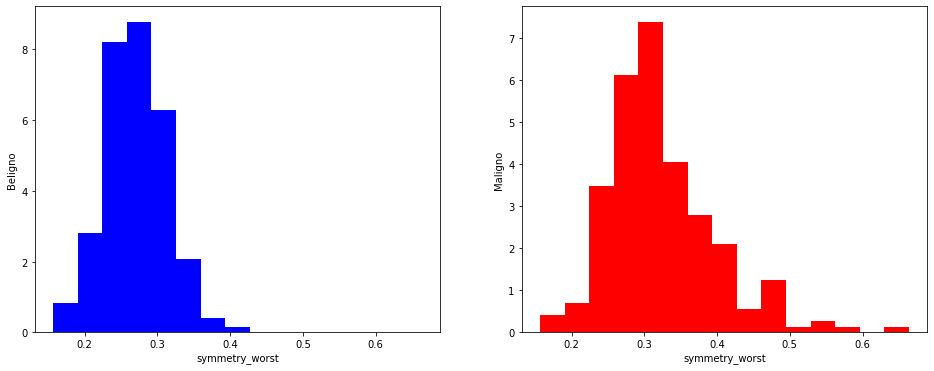

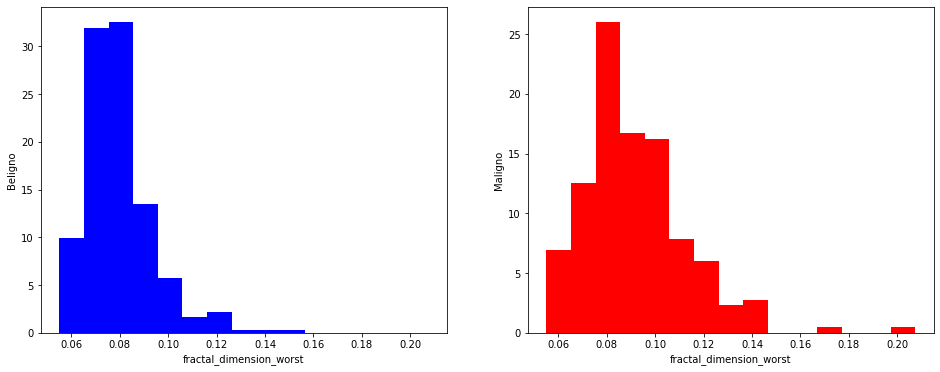

In [21]:
for var in varquanti:
    
    minimo = dados[var].min()
    maximo = dados[var].max()
    faixas = np.linspace(minimo, maximo, 16)
    bins = faixas   

    plt.figure(figsize=(16,6))

    plt.subplot(121)
    plt.hist(dados[dados.diagnosis==1][var], bins = faixas, color = 'b',density=True)
    plt.xlabel(var)
    plt.ylabel('Beligno')

    plt.subplot(122)
    plt.hist(dados[dados.diagnosis==0][var], bins = faixas, color = 'r',density=True)
    plt.xlabel(var)
    plt.ylabel('Maligno')

$\Rightarrow$ *Criando base de teste e treinamento*

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

*REGRESSÃO LOGISTICA*

In [59]:
#building the model and fitting the data 
#logit = sm.Logit( Y_train, X_train, method = "bfgs")
#log_reg = logit.fit() 

* *sklearn*

In [46]:
#clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
#clf.score(X_test, Y_test)